In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/df-merged-dept-emp-det/df_merged_dept_emp_det.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/df-merged-dept-emp-det/df_merged_dept_emp_det.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dept_name          13232 non-null  object 
 1   dept_head          13232 non-null  object 
 2   avg_monthly_hrs    13232 non-null  int64  
 3   department         13232 non-null  object 
 4   filed_complaint    1920 non-null   float64
 5   last_evaluation    11833 non-null  float64
 6   n_projects         13232 non-null  int64  
 7   recently_promoted  277 non-null    float64
 8   salary             13232 non-null  object 
 9   satisfaction       13082 non-null  float64
 10  status             13232 non-null  object 
 11  tenure             13082 non-null  float64
 12  employee_id        13232 non-null  int64  
 13  age                13232 non-null  int64  
 14  gender             13232 non-null  object 
 15  marital_status     13232 non-null  object 
dtypes: float64(5), int64(4

In [5]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age
count,13232.000000,1920.0,11833.000000,13232.000000,277.0,13082.000000,13082.000000,13232.000000,13232.000000
mean,200.013830,1.0,0.718513,3.782799,1.0,0.622142,3.509402,112114.316883,32.932588
std,50.907572,0.0,0.172977,1.251219,0.0,0.250538,1.479399,8498.801360,9.976125
min,49.000000,1.0,0.317279,1.000000,1.0,0.040058,2.000000,100101.000000,22.000000
25%,155.000000,1.0,0.564420,3.000000,1.0,0.451173,3.000000,105774.750000,24.000000
50%,199.000000,1.0,0.723931,4.000000,1.0,0.654416,3.000000,111291.500000,29.000000
75%,245.000000,1.0,0.871626,5.000000,1.0,0.825671,4.000000,116641.500000,41.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,148988.000000,57.000000


### Notes (from ydata_profiling)
* Convert our output variable from categorical to numerical
* All missing values in filed_complaint to be 0. All missing values in recently_promoted to be 0
* Imputing last_eval
* Missing values in tenure to be imputed by (some relationship b/w avg_monthly_hrs, n_projects and tenure) => multiple imputation
* Satisfaction and tenure are negatively-correlated
* Age and marital status highly correlated (expected)
* dept_head has no significance as if there were multiple heads then it would've made sense as to which manager is responsible for employees staying but that's not the case

## Converting Output Variable (Target) from Categorical to Numerical

In [6]:
df_duplicate = df.copy() #So that our main df doesn't get affected

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_duplicate['status_encoded'] = label_encoder.fit_transform(df_duplicate['status'])

# Convert 'status' to numerical labels
df_duplicate['status_numerical'] = label_encoder.fit_transform(df_duplicate['status'])

# Display the result
print(df_duplicate[['status', 'status_encoded', 'status_numerical']])

         status  status_encoded  status_numerical
0          Left               1                 1
1          Left               1                 1
2          Left               1                 1
3          Left               1                 1
4          Left               1                 1
...         ...             ...               ...
13227  Employed               0                 0
13228  Employed               0                 0
13229  Employed               0                 0
13230  Employed               0                 0
13231  Employed               0                 0

[13232 rows x 3 columns]


In [8]:
df_duplicate['filed_complaint'] = df_duplicate['filed_complaint'].fillna(0)
df_duplicate['recently_promoted'] = df_duplicate['recently_promoted'].fillna(0)

In [9]:
print("Missing values in filed_complaint:", df_duplicate['filed_complaint'].isnull().sum())
print("Missing values in recently_promoted:", df_duplicate['recently_promoted'].isnull().sum())

Missing values in filed_complaint: 0
Missing values in recently_promoted: 0


In [10]:
df_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dept_name          13232 non-null  object 
 1   dept_head          13232 non-null  object 
 2   avg_monthly_hrs    13232 non-null  int64  
 3   department         13232 non-null  object 
 4   filed_complaint    13232 non-null  float64
 5   last_evaluation    11833 non-null  float64
 6   n_projects         13232 non-null  int64  
 7   recently_promoted  13232 non-null  float64
 8   salary             13232 non-null  object 
 9   satisfaction       13082 non-null  float64
 10  status             13232 non-null  object 
 11  tenure             13082 non-null  float64
 12  employee_id        13232 non-null  int64  
 13  age                13232 non-null  int64  
 14  gender             13232 non-null  object 
 15  marital_status     13232 non-null  object 
 16  status_encoded     132

tenure and satisfaction both have 13082 i.e. same no of missing columns... 
[After checking with data on excel] we can say, data missing is same for both columns

* considering to drop now... might look into imputing later

## Dropping null values in tenure and satisfaction

In [11]:
df_duplicate = df_duplicate.dropna(subset=['tenure', 'satisfaction'])

In [12]:
df_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13082 entries, 0 to 13231
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dept_name          13082 non-null  object 
 1   dept_head          13082 non-null  object 
 2   avg_monthly_hrs    13082 non-null  int64  
 3   department         13082 non-null  object 
 4   filed_complaint    13082 non-null  float64
 5   last_evaluation    11833 non-null  float64
 6   n_projects         13082 non-null  int64  
 7   recently_promoted  13082 non-null  float64
 8   salary             13082 non-null  object 
 9   satisfaction       13082 non-null  float64
 10  status             13082 non-null  object 
 11  tenure             13082 non-null  float64
 12  employee_id        13082 non-null  int64  
 13  age                13082 non-null  int64  
 14  gender             13082 non-null  object 
 15  marital_status     13082 non-null  object 
 16  status_encoded     13082 no

## Checking distributions and outliers

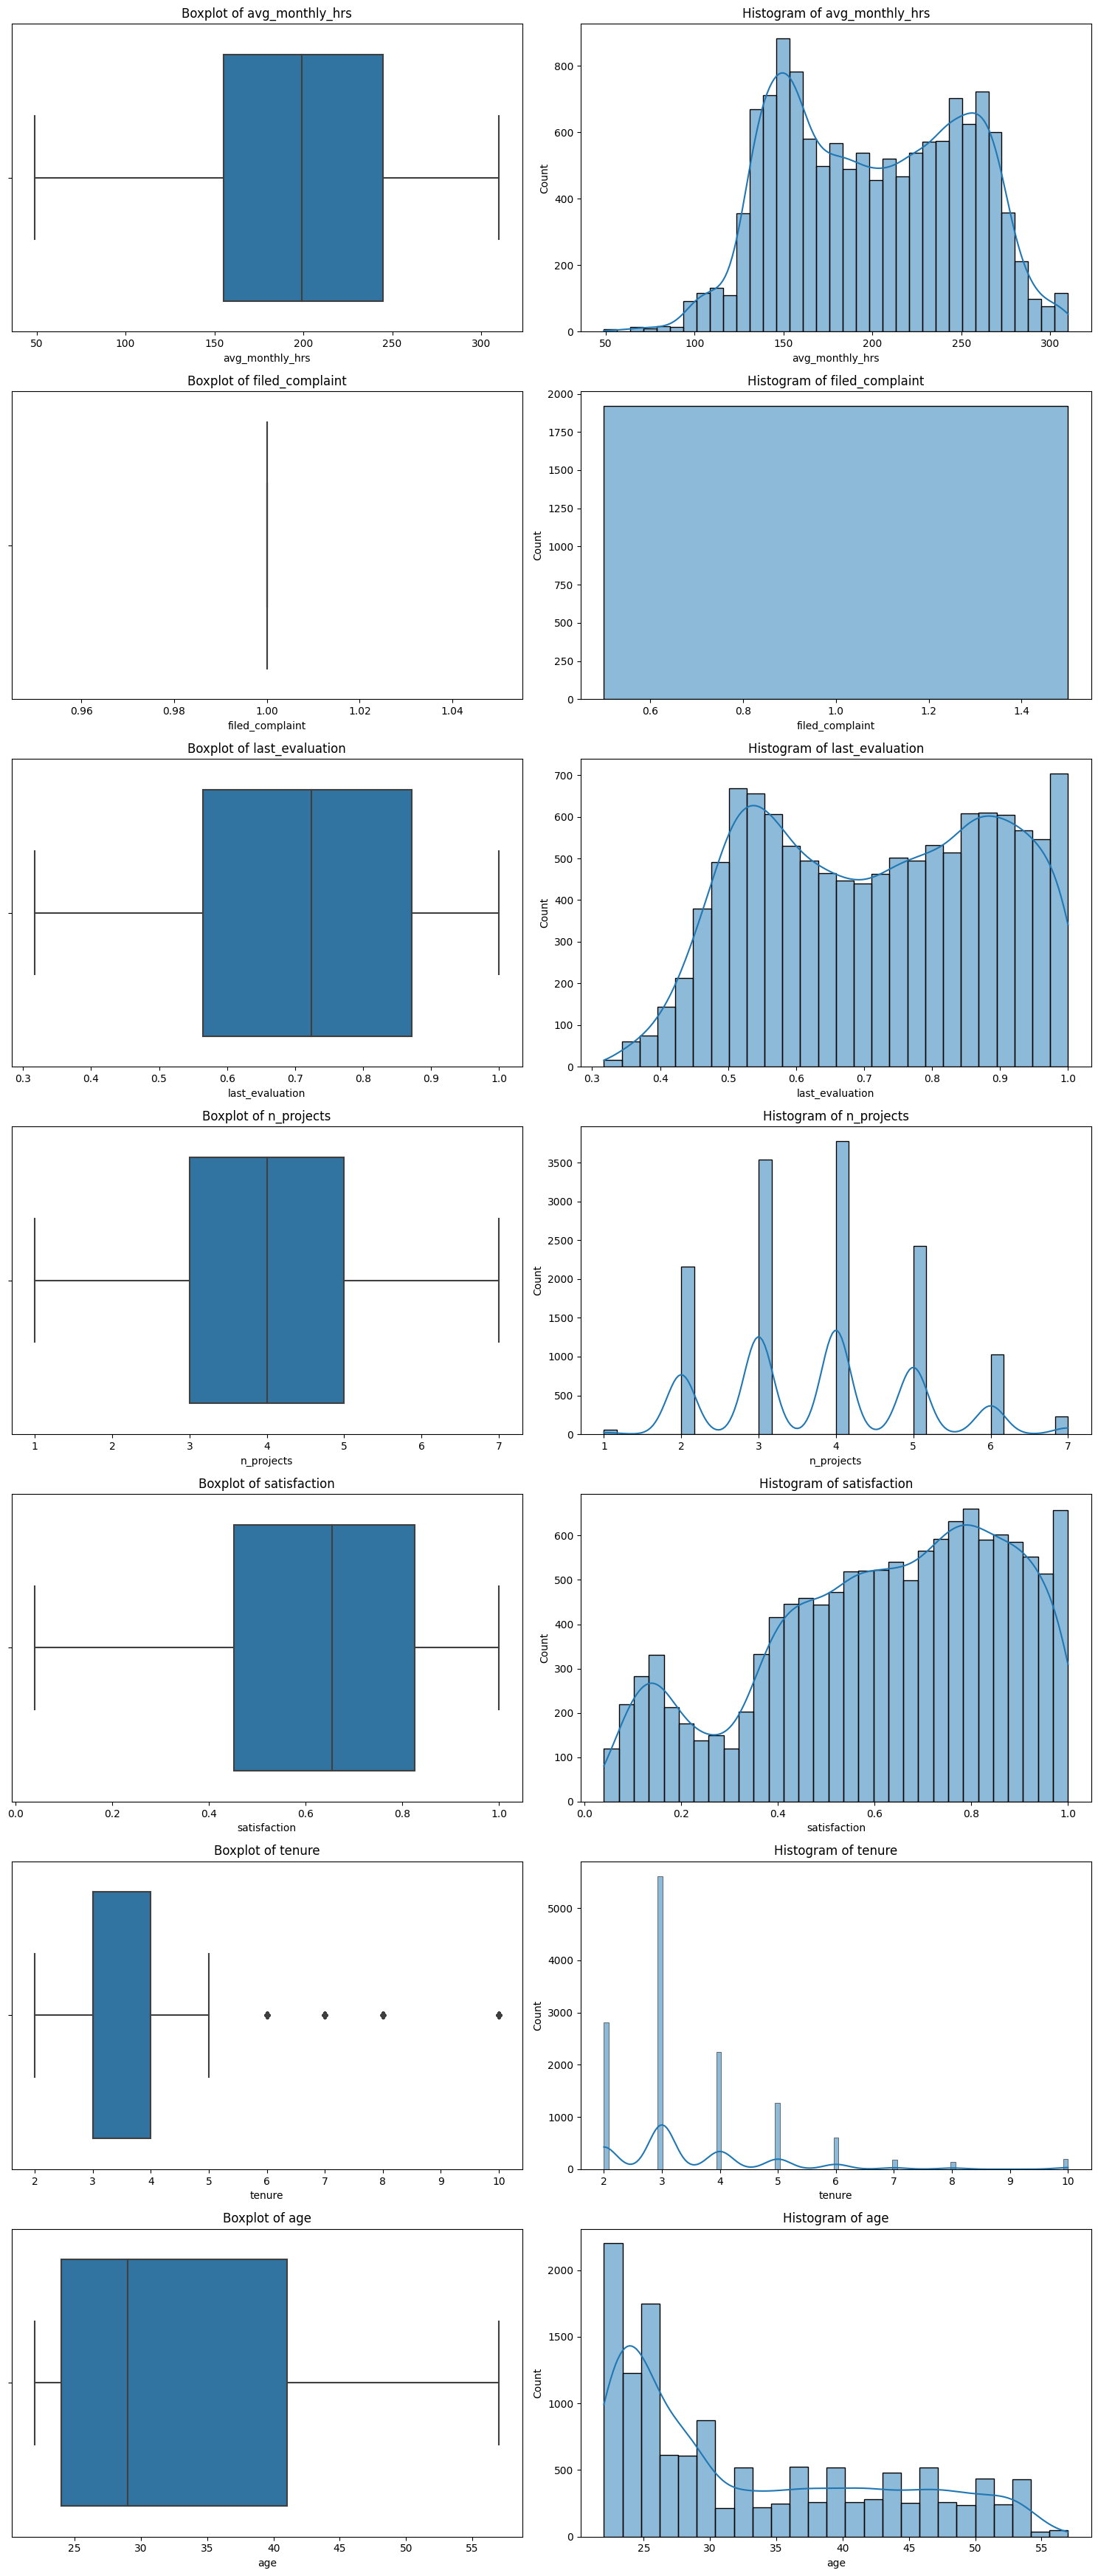

In [13]:
%matplotlib inline
# List of columns to check for outliers
columns_to_check = ['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects', 'satisfaction', 'tenure', 'age']

# Create subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 35))

# Plot box plots and histograms
for i, column in enumerate(columns_to_check):
    sns.boxplot(x=df[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {column}')
    
    sns.histplot(df[column], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

## Fixing Tenure v/s Age (Outlier)

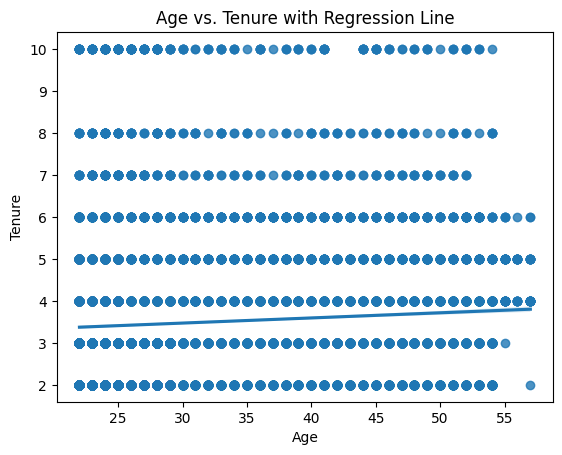

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='age', y='tenure', data=df)
plt.title('Age vs. Tenure with Regression Line')
plt.xlabel('Age')
plt.ylabel('Tenure')
plt.show()

Number of outliers detected by Rule-Based Filtering: 376
Number of outliers detected by IQR Filtering: 1138
        Original_count  Original_mean  Original_std  Original_min  \
age              13082      33.022856      9.992537          22.0   
tenure           13082       3.509402      1.479399           2.0   

        Original_25%  Original_50%  Original_75%  Original_max  \
age             24.0          29.0          41.0          57.0   
tenure           3.0           3.0           4.0          10.0   

        Rule_Based_count  Rule_Based_mean  ...  Rule_Based_75%  \
age                12706        33.317016  ...            42.0   
tenure             12706         3.404218  ...             4.0   

        Rule_Based_max  IQR_count   IQR_mean   IQR_std  IQR_min  IQR_25%  \
age               57.0      11944  32.956212  9.987911     22.0     24.0   
tenure            10.0      11944   3.165271  0.906763      2.0      3.0   

        IQR_50%  IQR_75%  IQR_max  
age        29.0     4

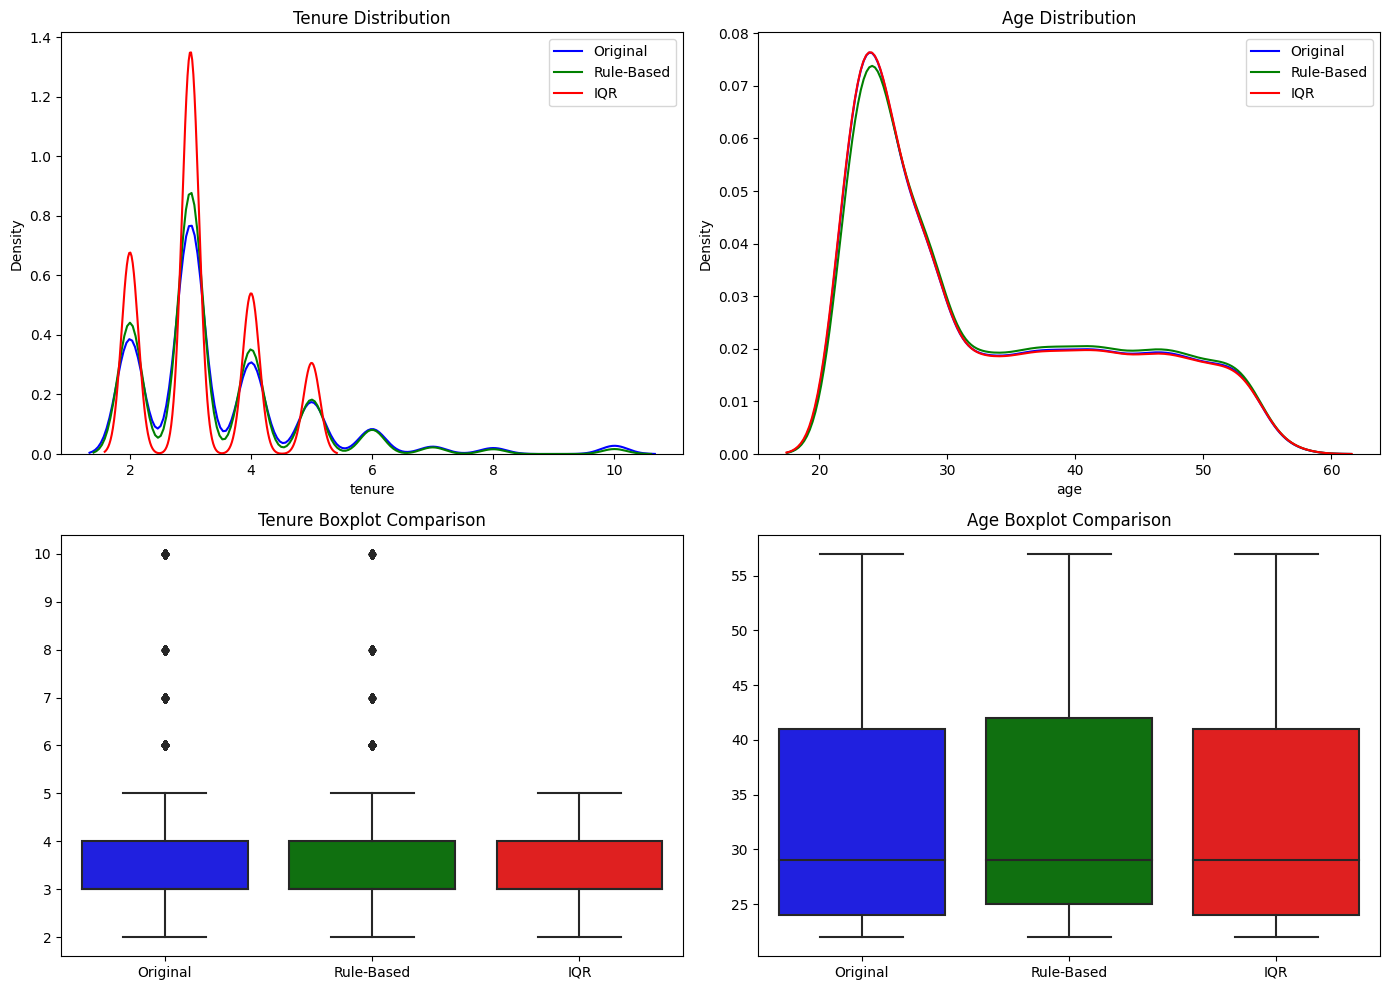

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df_duplicate is the dataframe you want to work with

# Step 1: Generate statistics for original data
def generate_statistics(df, label):
    stats = pd.DataFrame({
        f'{label}_count': df[['age', 'tenure']].count(),
        f'{label}_mean': df[['age', 'tenure']].mean(),
        f'{label}_std': df[['age', 'tenure']].std(),
        f'{label}_min': df[['age', 'tenure']].min(),
        f'{label}_25%': df[['age', 'tenure']].quantile(0.25),
        f'{label}_50%': df[['age', 'tenure']].median(),
        f'{label}_75%': df[['age', 'tenure']].quantile(0.75),
        f'{label}_max': df[['age', 'tenure']].max()
    })
    return stats

# Original Data Statistics
original_stats = generate_statistics(df_duplicate, 'Original')
# Step 2: Rule-Based Filtering
def detect_outliers_rule_based(df):
    mask = pd.Series(False, index=df.index)
    valid_data = df[df['tenure'].notna()]
    valid_data['starting_age'] = valid_data['age'] - valid_data['tenure']
    mask.loc[valid_data.index] = (
        (valid_data['age'] < 18) |
        (valid_data['age'] > 65) |
        (valid_data['starting_age'] < 18)
    )
    return mask

# Apply Rule-Based Filtering
rule_based_outliers_mask = detect_outliers_rule_based(df_duplicate)
df_rule_based_filtered = df_duplicate[~rule_based_outliers_mask]

# Rule-Based Filtered Statistics
rule_based_stats = generate_statistics(df_rule_based_filtered, 'Rule_Based')

# Step 3: IQR Filtering
def detect_outliers_iqr(df):
    Q1 = df['tenure'].quantile(0.25)
    Q3 = df['tenure'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)
    return mask
# Apply IQR Filtering
iqr_outliers_mask = detect_outliers_iqr(df_duplicate)
df_iqr_filtered = df_duplicate[~iqr_outliers_mask]

# IQR Filtered Statistics
iqr_stats = generate_statistics(df_iqr_filtered, 'IQR')

# Step 4: Compare number of outliers detected
num_rule_based_outliers = rule_based_outliers_mask.sum()
num_iqr_outliers = iqr_outliers_mask.sum()

print(f"Number of outliers detected by Rule-Based Filtering: {num_rule_based_outliers}")
print(f"Number of outliers detected by IQR Filtering: {num_iqr_outliers}")

# Step 5: Combine statistics for comparison
combined_stats = pd.concat([original_stats, rule_based_stats, iqr_stats], axis=1)
print(combined_stats)

# Step 6: Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Tenure Distribution (Original, Rule-Based, IQR)
sns.kdeplot(df_duplicate['tenure'], ax=axes[0,0], label='Original', color='blue')
sns.kdeplot(df_rule_based_filtered['tenure'], ax=axes[0,0], label='Rule-Based', color='green')
sns.kdeplot(df_iqr_filtered['tenure'], ax=axes[0,0], label='IQR', color='red')
axes[0,0].set_title('Tenure Distribution')
axes[0,0].legend()

# Age Distribution (Original, Rule-Based, IQR)
sns.kdeplot(df_duplicate['age'], ax=axes[0,1], label='Original', color='blue')
sns.kdeplot(df_rule_based_filtered['age'], ax=axes[0,1], label='Rule-Based', color='green')
sns.kdeplot(df_iqr_filtered['age'], ax=axes[0,1], label='IQR', color='red')
axes[0,1].set_title('Age Distribution')
axes[0,1].legend()

# Boxplot: Tenure comparison across methods
sns.boxplot(data=[df_duplicate['tenure'], df_rule_based_filtered['tenure'], df_iqr_filtered['tenure']],
            ax=axes[1,0], palette=['blue', 'green', 'red'])
axes[1,0].set_xticklabels(['Original', 'Rule-Based', 'IQR'])
axes[1,0].set_title('Tenure Boxplot Comparison')

# Boxplot: Age comparison across methods
sns.boxplot(data=[df_duplicate['age'], df_rule_based_filtered['age'], df_iqr_filtered['age']],
            ax=axes[1,1], palette=['blue', 'green', 'red'])
axes[1,1].set_xticklabels(['Original', 'Rule-Based', 'IQR'])
axes[1,1].set_title('Age Boxplot Comparison')

plt.tight_layout()
plt.show()

**The issue is not having an outlier experience of 10years but a 21year old having tenure=10years is an issue -> Choosing rule-based**

#### Conclusion for (Age v/s) Tenure:
* IQR removes significantly more data, possibly filtering valid data points (e.g., longer tenured employees). This reduction can lead to underfitting or loss of important variability in your model.
* The max tenure is reduced to 5 years, which might be too restrictive depending on the nature of the organization. Some long-tenured employees (e.g., 8-10 years) are likely valid and important for modeling attrition.
* Rule-Based Approach is likely better as It retains more data, which is important for modeling, allows for realistic long-tenure employees
* Outlier detection -> Imputation (keeping correlations and stats in place) better than removal of entries


In [16]:
df_new = df_duplicate.copy() #To check before-after imputing plots

### Imputing with rule-based

In [17]:
import pandas as pd

def remove_outliers(df_duplicate: pd.DataFrame, age_min: int = 18, age_max: int = 65) -> pd.DataFrame:
    # Drop rows with null values in 'age' or 'tenure'
    df_cleaned = df_duplicate.dropna(subset=['age', 'tenure'])
    
    # Remove rows where 'age' is outside the valid range
    df_cleaned = df_cleaned[(df_cleaned['age'] >= age_min) & (df_cleaned['age'] <= age_max)]
    
    # Rule-based removal: tenure should not exceed age - 18
    df_cleaned = df_cleaned[df_cleaned['tenure'] <= (df_cleaned['age'] - age_min)]
    
    return df_cleaned

# Apply the function
df_duplicate = remove_outliers(df_duplicate)


In [18]:
df_duplicate.isnull().sum() 

dept_name               0
dept_head               0
avg_monthly_hrs         0
department              0
filed_complaint         0
last_evaluation      1249
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
employee_id             0
age                     0
gender                  0
marital_status          0
status_encoded          0
status_numerical        0
dtype: int64

### Before imputing chart👇

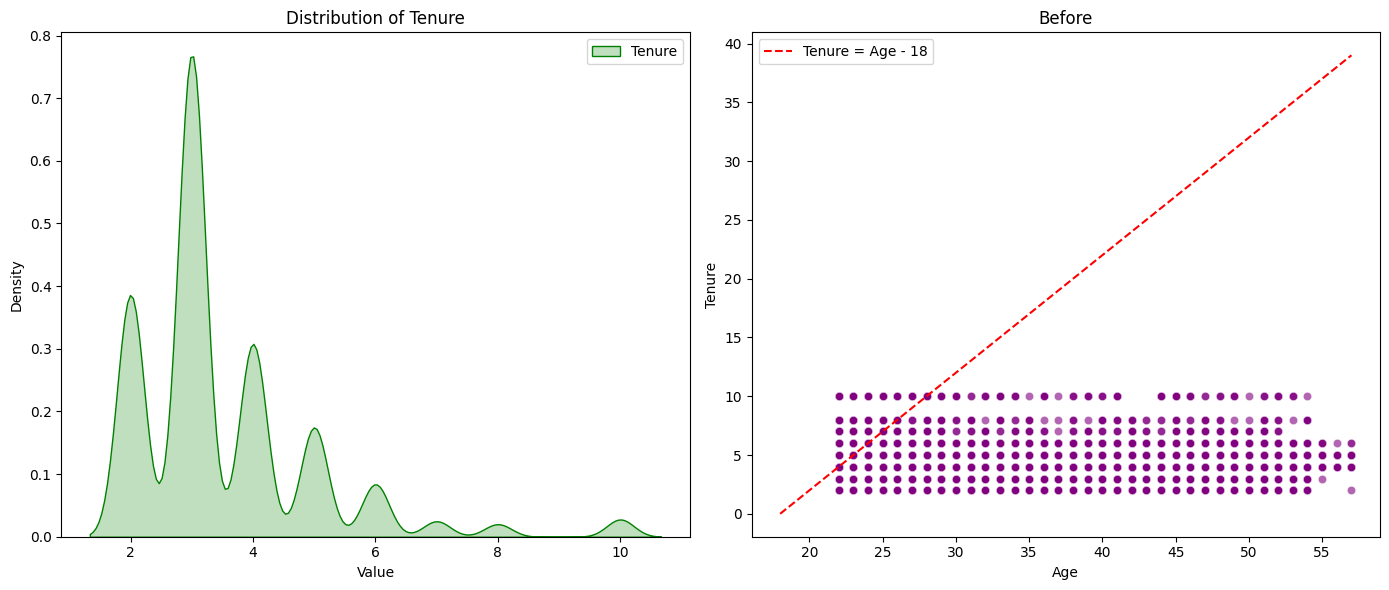

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_age_tenure_relationship(df):
    """
    Plot the relationship and distribution of age and tenure.
    """

    # Set up the figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 1. Distribution of Age and Tenure
    sns.kdeplot(df['tenure'], ax=axes[0], label='Tenure', color='green', shade=True)
    axes[0].set_title('Distribution of Tenure')
    axes[0].set_xlabel('Value')
    axes[0].legend()

    # 2. Scatter plot for Age vs Tenure
    sns.scatterplot(data=df, x='age', y='tenure', ax=axes[1], color='purple', alpha=0.6)
    sns.lineplot(x=[18, df['age'].max()], y=[0, df['age'].max() - 18], ax=axes[1], color='red', linestyle='--', label='Tenure = Age - 18')  # Rule-based line
    axes[1].set_title('Relationship between Age and Tenure')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('Tenure')
    axes[1].legend()

    # Show the plots
    plt.title("Before")
    plt.tight_layout()
    plt.show()

# Example usage:
plot_age_tenure_relationship(df_new)


### After Imputing chart ⬇️

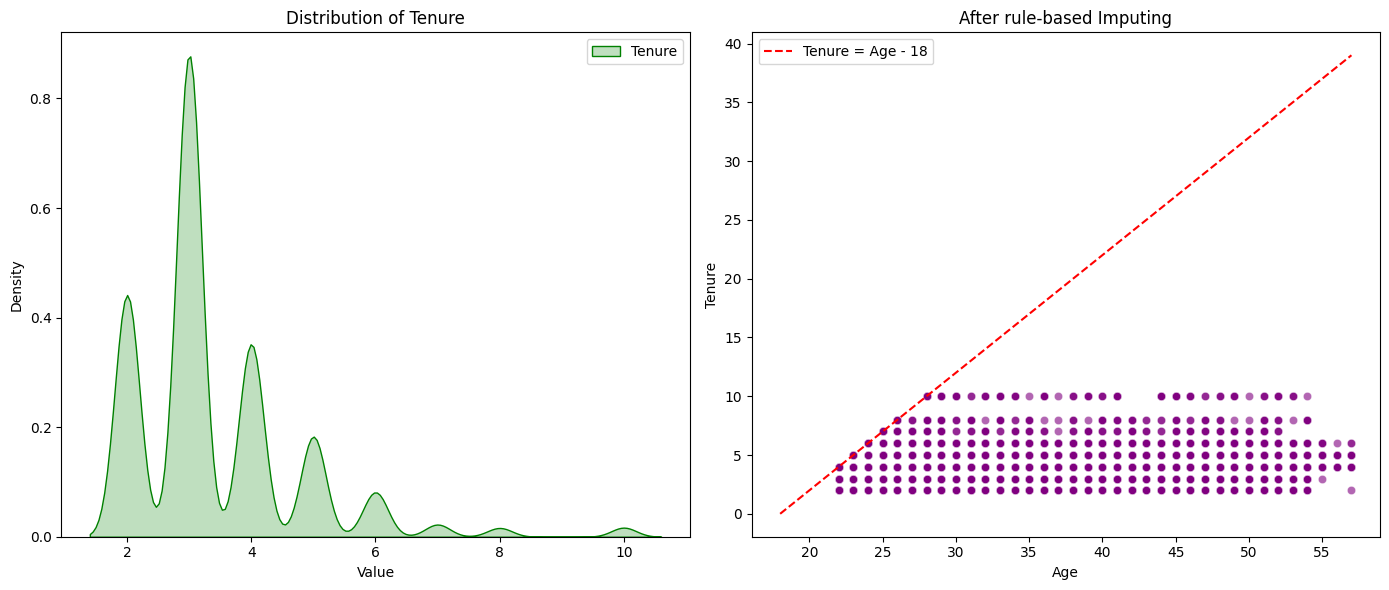

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_age_tenure_relationship(df):
    """
    Plot the relationship and distribution of age and tenure.
    """

    # Set up the figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 1. Distribution of Age and Tenure
    sns.kdeplot(df['tenure'], ax=axes[0], label='Tenure', color='green', shade=True)
    axes[0].set_title('Distribution of Tenure')
    axes[0].set_xlabel('Value')
    axes[0].legend()

    # 2. Scatter plot for Age vs Tenure
    sns.scatterplot(data=df, x='age', y='tenure', ax=axes[1], color='purple', alpha=0.6)
    sns.lineplot(x=[18, df['age'].max()], y=[0, df['age'].max() - 18], ax=axes[1], color='red', linestyle='--', label='Tenure = Age - 18')  # Rule-based line
    axes[1].set_title('Relationship between Age and Tenure')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('Tenure')
    axes[1].legend()

    # Show the plots
    plt.title("After rule-based Imputing")
    plt.tight_layout()
    plt.show()

# Example usage:
plot_age_tenure_relationship(df_duplicate)


## Finding optimized imputation technique for last_evaluation

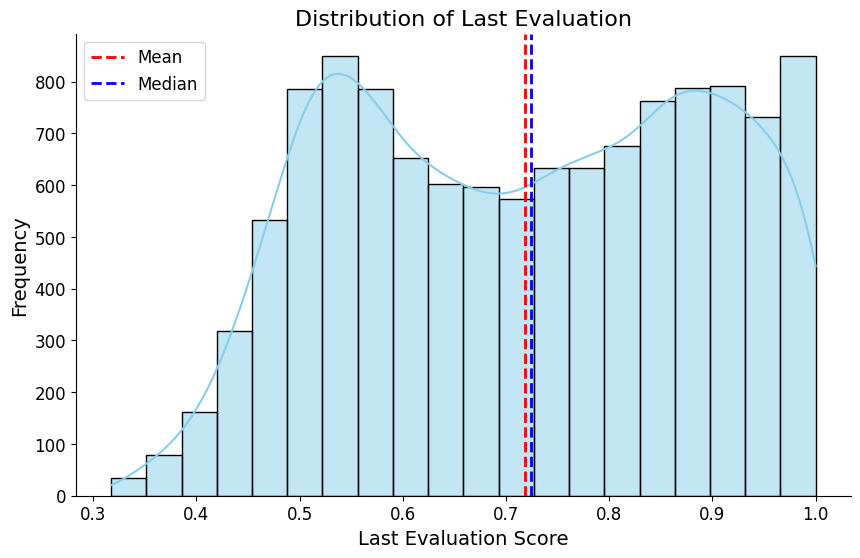

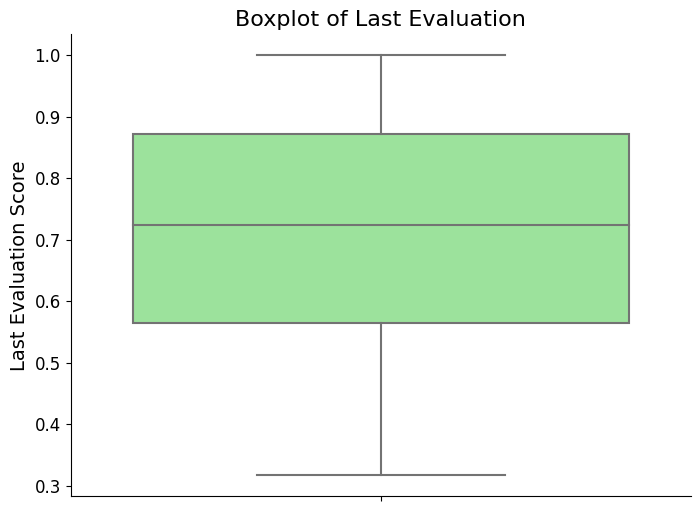

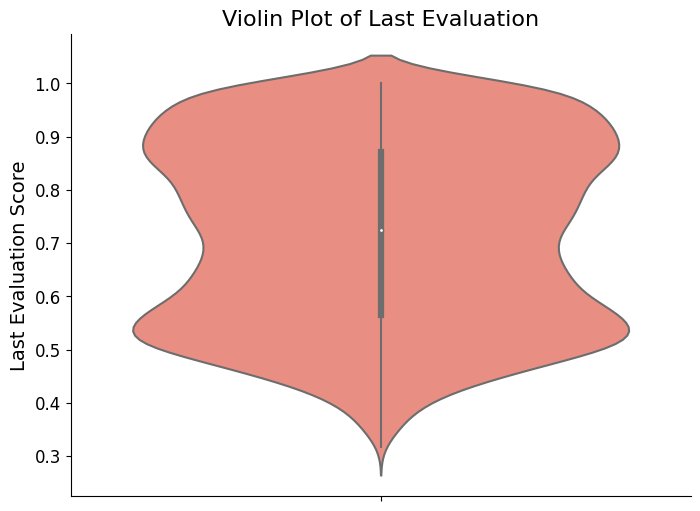

In [21]:
df['last_evaluation'].describe()

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Create a histogram with a density curve
sns.histplot(df['last_evaluation'], kde=True, bins=20, color='skyblue')

# Customize the plot elements
plt.title('Distribution of Last Evaluation', fontsize=16)
plt.xlabel('Last Evaluation Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adjust tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a vertical line for the mean
plt.axvline(df['last_evaluation'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['last_evaluation'].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')

# Add a legend
plt.legend(fontsize=12)

# Remove top and right spines for a cleaner look (R-style)
sns.despine()

plt.show()


# Boxplot of last_evaluation (R-style)
plt.figure(figsize=(8, 6))

sns.boxplot(y='last_evaluation', data=df, color='lightgreen')

plt.title('Boxplot of Last Evaluation', fontsize=16)
plt.ylabel('Last Evaluation Score', fontsize=14)

# Adjust tick label font size
plt.yticks(fontsize=12)

# Remove top and right spines
sns.despine()

plt.show()

# Violin plot of last_evaluation (R-style)
plt.figure(figsize=(8, 6))

sns.violinplot(y='last_evaluation', data=df, color='salmon')

plt.title('Violin Plot of Last Evaluation', fontsize=16)
plt.ylabel('Last Evaluation Score', fontsize=14)

# Adjust tick label font size
plt.yticks(fontsize=12)

# Remove top and right spines
sns.despine()

plt.show()

* Imputing made 13082 values to 12706 values look into it

In [22]:
df_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12706 entries, 0 to 13231
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dept_name          12706 non-null  object 
 1   dept_head          12706 non-null  object 
 2   avg_monthly_hrs    12706 non-null  int64  
 3   department         12706 non-null  object 
 4   filed_complaint    12706 non-null  float64
 5   last_evaluation    11457 non-null  float64
 6   n_projects         12706 non-null  int64  
 7   recently_promoted  12706 non-null  float64
 8   salary             12706 non-null  object 
 9   satisfaction       12706 non-null  float64
 10  status             12706 non-null  object 
 11  tenure             12706 non-null  float64
 12  employee_id        12706 non-null  int64  
 13  age                12706 non-null  int64  
 14  gender             12706 non-null  object 
 15  marital_status     12706 non-null  object 
 16  status_encoded     12706 no

In [23]:
df_duplicate['last_evaluation'].isnull().sum()


1249

In [24]:
df_duplicate['last_evaluation'].describe()

count    11457.000000
mean         0.717090
std          0.172704
min          0.317279
25%          0.563188
50%          0.721493
75%          0.870204
max          1.000000
Name: last_evaluation, dtype: float64

**Used Median as It is negatively skewed distribution**

In [25]:
# Impute missing values in the 'last_evaluation' column with the median
df_duplicate['last_evaluation'].fillna(df_duplicate['last_evaluation'].median(), inplace=True)

In [26]:
df_duplicate['last_evaluation'].isnull().sum()

0

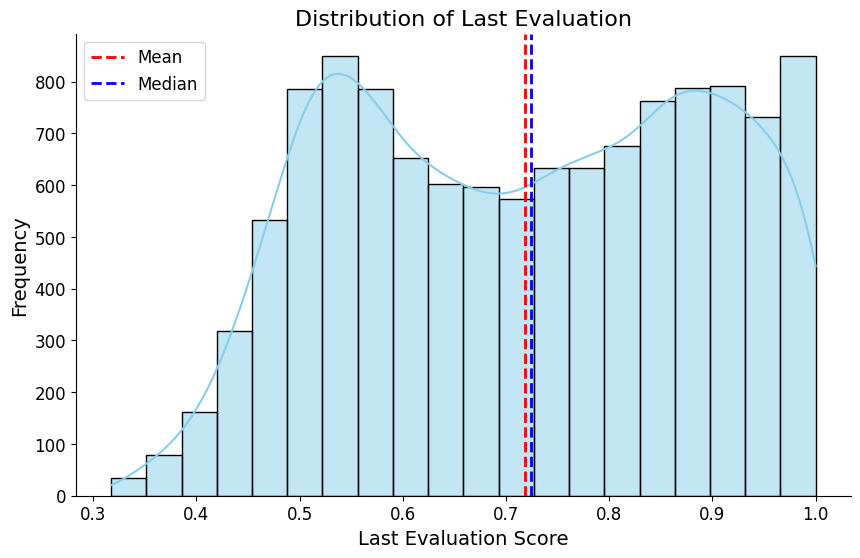

In [27]:
%matplotlib inline
df_duplicate['last_evaluation'].describe()

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Create a histogram with a density curve
sns.histplot(df['last_evaluation'], kde=True, bins=20, color='skyblue')

# Customize the plot elements
plt.title('Distribution of Last Evaluation', fontsize=16)
plt.xlabel('Last Evaluation Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adjust tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a vertical line for the mean
plt.axvline(df['last_evaluation'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['last_evaluation'].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
# Add a legend
plt.legend(fontsize=12)

# Adjust tick label font size
plt.yticks(fontsize=12)

# Remove top and right spines
sns.despine()

plt.show()

In [28]:
df_duplicate['last_evaluation'].describe()

count    12706.000000
mean         0.717523
std          0.164001
min          0.317279
25%          0.576942
50%          0.721493
75%          0.856129
max          1.000000
Name: last_evaluation, dtype: float64

* The mean has changed very slightly, which suggests that the imputed values are close to the existing distribution
* A decrease in standard deviation suggests that the imputed values are more clustered around the mean compared to the original values. This is typical when adding a constant value (the median) to fill missing data.
* The median (50th percentile) remains unchanged, which is a good sign since it indicates that the central tendency of your data has not been significantly affected

# EDA

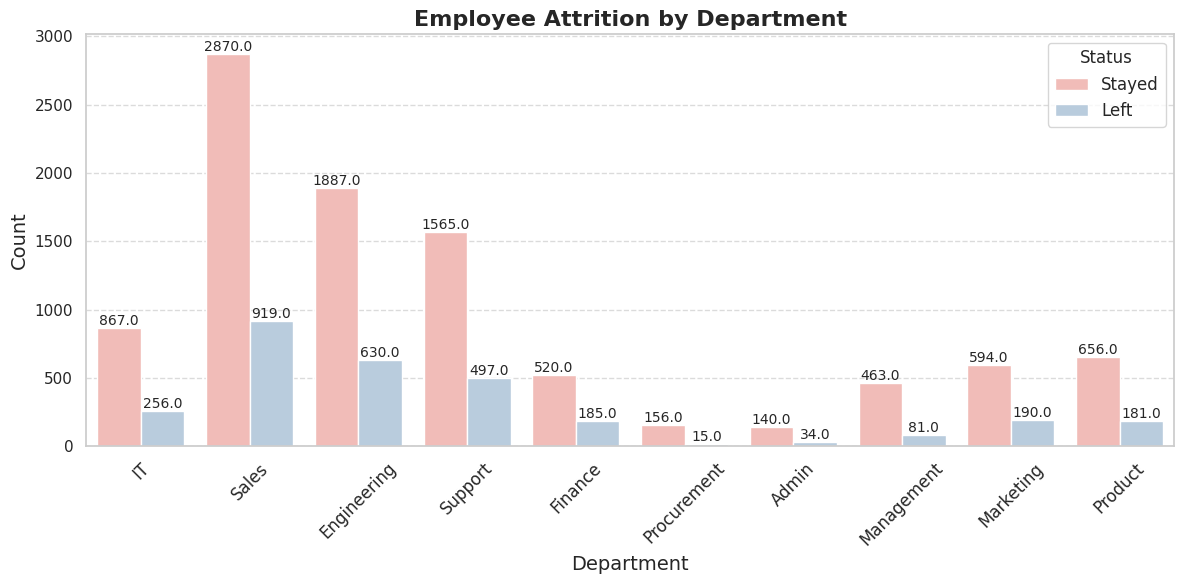

                Stayed       Left
dept_name                        
Admin        80.459770  19.540230
Engineering  74.970203  25.029797
Finance      73.758865  26.241135
IT           77.203918  22.796082
Management   85.110294  14.889706
Marketing    75.765306  24.234694
Procurement  91.228070   8.771930
Product      78.375149  21.624851
Sales        75.745579  24.254421
Support      75.897187  24.102813


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Pastel1")  # Choose a soft color palette
sns.countplot(x='dept_name', hue='status_numerical', data=df_duplicate, palette=palette)

# Title and labels with increased font size
plt.title('Employee Attrition by Department', fontsize=16, fontweight='bold')
plt.xlabel('Department', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Status', labels=['Stayed', 'Left'], fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-tick labels for better visibility
plt.xticks(rotation=45, fontsize=12)

# Show data labels on the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

# Count of employees in each department, split by attrition status
department_status = pd.crosstab(df_duplicate['dept_name'], df_duplicate['status_numerical'], normalize='index') * 100
department_status.columns = ['Stayed', 'Left']
print(department_status)

**Observations**

* The highest retention rate is in the Procurement department (91.23%), indicating that most employees in this department tend to stay.
* The Management department also shows a high retention rate (85.11%), suggesting effective engagement and satisfaction levels among its employees.
* The Engineering department has the lowest retention rate (74.97%), with 25.03% of employees leaving
* The Engineering and Finance departments may need targeted strategies to improve employee retention

**The strategies employed in Procurement and Management could serve as models for other departments**

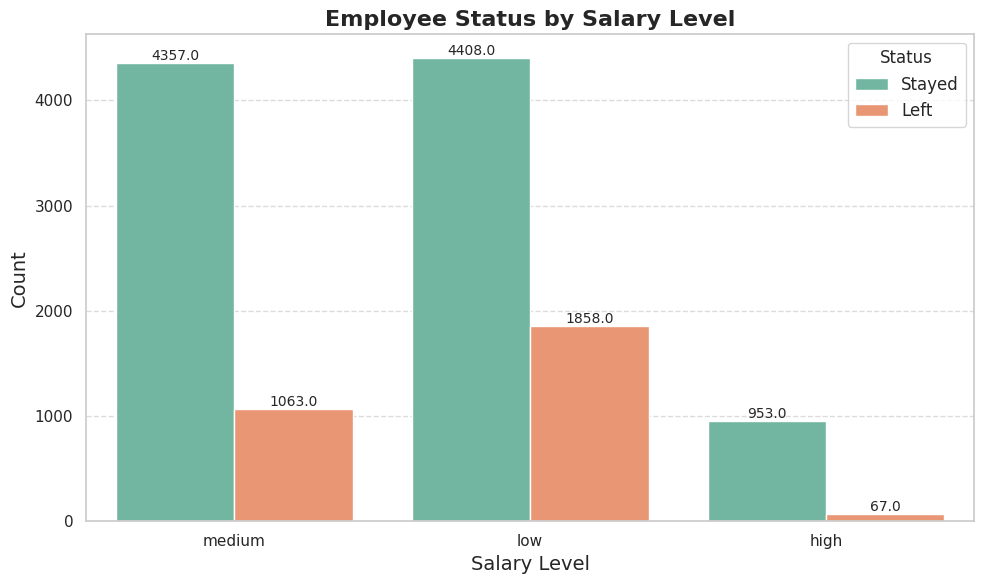

status_numerical     0     1  Proportion_Left  Proportion_Stayed
salary                                                          
high               953    67         0.065686           0.934314
low               4408  1858         0.296521           0.703479
medium            4357  1063         0.196125           0.803875


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set2")  # Use a color palette with good contrast
sns.countplot(x='salary', hue='status_numerical', data=df_duplicate, palette=palette)

# Title and labels with increased font size
plt.title('Employee Status by Salary Level', fontsize=16, fontweight='bold')
plt.xlabel('Salary Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Status', labels=['Stayed', 'Left'], fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show data labels on the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

# proportions for each salary level
salary_summary = df_duplicate.groupby(['salary', 'status_numerical']).size().unstack()
salary_summary['Proportion_Left'] = salary_summary[1] / (salary_summary[0] + salary_summary[1])
salary_summary['Proportion_Stayed'] = salary_summary[0] / (salary_summary[0] + salary_summary[1])

print(salary_summary)

**Observations:**

Low Salary Level:
There is a significant portion of employees with low salaries who left the company.
However, more employees in this category stayed compared to those who left.

Medium Salary Level:
The majority of employees in this salary range stayed with the company.
A relatively smaller, but notable, portion of employees left the company, though the difference between those who stayed and left is substantial.
High Salary Level:

Analysis:
Attrition is more common among employees with lower salaries, as the proportion of employees who left in the low salary category is relatively high compared to the other categories.
Employees with higher salaries stay with the company, indicating that salary might be an important factor in reducing employee attrition.

The medium salary group also shows more stability, though there are still some employees who leave, suggesting that other factors could influence decisions to leave at this salary level.
Implications:

**Focusing on increasing compensation or providing better incentives for those in the lower salary bracket could be an effective strategy for reducing overall attrition.**


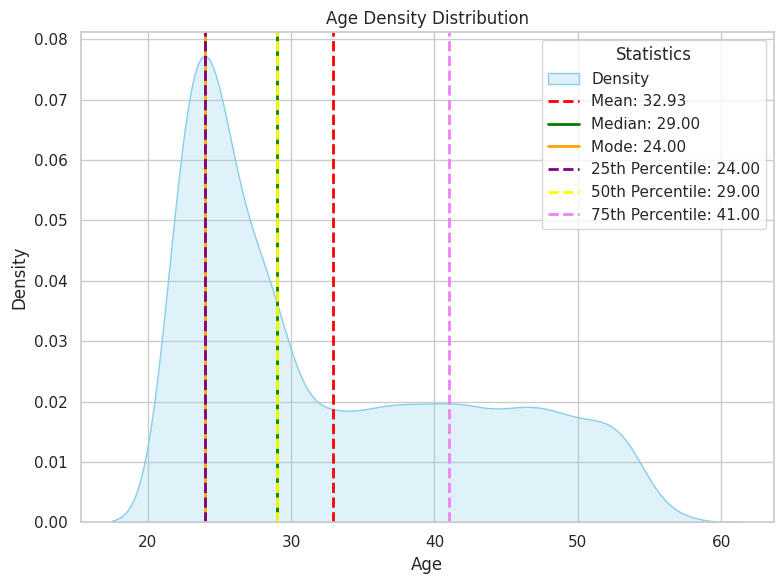

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame and 'age' is the column containing age data
# Calculate relevant statistics
age_mean = df['age'].mean()
age_median = df['age'].median()
age_mode = df['age'].mode()[0]  # Get the first mode if multiple exist
age_percentiles = np.percentile(df['age'], [25, 50, 75])

# Create a density plot using seaborn's `kdeplot` with a custom color palette
sns.set_theme(style="whitegrid", palette="pastel")  # Set a theme for better visualization
plt.figure(figsize=(8, 6))
sns.kdeplot(df['age'], shade=True, color="skyblue", label="Density")
plt.title('Age Density Distribution')
plt.xlabel('Age')
plt.ylabel('Density')

# Add vertical lines for mean, median, and mode with custom labels and line styles
plt.axvline(age_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {age_mean:.2f}')
plt.axvline(age_median, color='green', linestyle='solid', linewidth=2, label=f'Median: {age_median:.2f}')
plt.axvline(age_mode, color='orange', linestyle='solid', linewidth=2, label=f'Mode: {age_mode:.2f}')

# Add percentiles as dashed lines with custom labels and distinct colors
plt.axvline(age_percentiles[0], color='purple', linestyle='dashed', linewidth=2, label=f'25th Percentile: {age_percentiles[0]:.2f}')
plt.axvline(age_percentiles[1], color='yellow', linestyle='dashed', linewidth=2, label=f'50th Percentile: {age_percentiles[1]:.2f}')
plt.axvline(age_percentiles[2], color='violet', linestyle='dashed', linewidth=2, label=f'75th Percentile: {age_percentiles[2]:.2f}')

# Add a legend with a custom title
plt.legend(title="Statistics")

# Adjust the layout for better spacing
plt.tight_layout()

plt.show()

**Observations:**
* The median age of 29 suggests that a significant portion of your employees are young
* Mode at 24: This indicates a concentration of employees in the early to mid-20s (Young Workforce)
* The 75th percentile at 41 suggests a more experienced group, possibly supervisors or team leads.
* Experience gap: The right-skewed distribution indicates a potential experience gap.

<Figure size 1200x700 with 0 Axes>

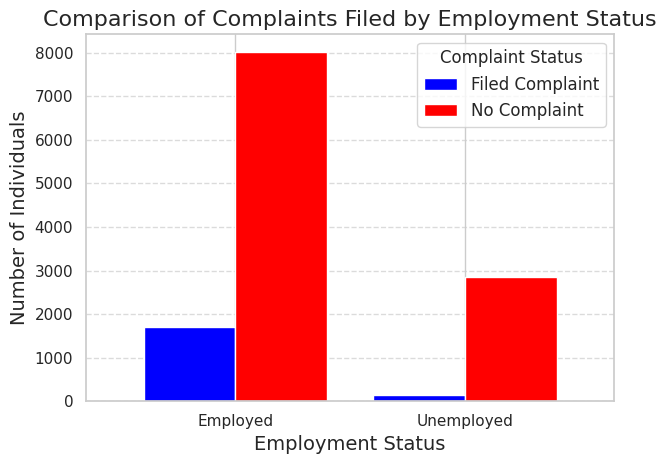

                                  Metric        Value
0                         Total Employed  9718.000000
1             Filed Complaint (Employed)  1698.000000
2                No Complaint (Employed)  8020.000000
3    Proportion of Complaints (Employed)    17.472731
4                       Total Unemployed  2988.000000
5           Filed Complaint (Unemployed)   135.000000
6              No Complaint (Unemployed)  2853.000000
7  Proportion of Complaints (Unemployed)     4.518072


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_duplicate is your DataFrame
# df_duplicate = pd.read_csv('your_data.csv')

# Step 1: Count complaints filed in each group (employed and unemployed)
complaint_counts = df_duplicate.groupby(['status_numerical', 'filed_complaint']).size().unstack(fill_value=0)
complaint_counts.columns = ['No Complaint', 'Filed Complaint']
complaint_counts.index = ['Employed', 'Unemployed']

# Calculate totals and proportions
complaint_counts['Total'] = complaint_counts.sum(axis=1)
complaint_counts['Proportion of Complaints (%)'] = (complaint_counts['Filed Complaint'] / complaint_counts['Total']) * 100

# Step 2: Enhanced plotting with Seaborn styling
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Side-by-side bar plot
complaint_counts[['Filed Complaint', 'No Complaint']].plot(kind='bar', width=0.8, color=['blue', 'red'])
plt.title('Comparison of Complaints Filed by Employment Status', fontsize=16)
plt.xlabel('Employment Status', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Complaint Status', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 3: Display comprehensive stats
total_employed = complaint_counts.loc['Employed', 'Total']
total_unemployed = complaint_counts.loc['Unemployed', 'Total']

# Structuring and displaying stats in DataFrame format
stats = {
    'Total Employed': total_employed,
    'Filed Complaint (Employed)': complaint_counts.loc['Employed', 'Filed Complaint'],
    'No Complaint (Employed)': complaint_counts.loc['Employed', 'No Complaint'],
    'Proportion of Complaints (Employed)': complaint_counts.loc['Employed', 'Proportion of Complaints (%)'],
    
    'Total Unemployed': total_unemployed,
    'Filed Complaint (Unemployed)': complaint_counts.loc['Unemployed', 'Filed Complaint'],
    'No Complaint (Unemployed)': complaint_counts.loc['Unemployed', 'No Complaint'],
    'Proportion of Complaints (Unemployed)': complaint_counts.loc['Unemployed', 'Proportion of Complaints (%)'],
}

# Display stats in a structured format
stats_df = pd.DataFrame(stats.items(), columns=['Metric', 'Value'])
print(stats_df)

**Observations**
* 17.47% of employed individuals have filed complaints, indicating notable dissatisfaction.
* The high complaint rate among the employed may reflect systemic issues within the workplace
* Analyzing the nature of complaints can uncover specific areas for improvement, helping to prevent attrition and improve retention of employees

## Dropping dept_head & department column

**Dropping as one department has only one head (if multiple heads then would've made sense to NOT drop and find relation b/w dept_head and attrition rate), but as that's not the case => dropping dept_head (No Significance in data)**

In [33]:
df_duplicate = df_duplicate.drop('dept_head', axis=1)

* department is id form of dept_name column which has NO Significance in Data analysis process and modelling

In [34]:
df_duplicate = df_duplicate.drop('department', axis=1)

In [35]:
import pandas as pd

# Get data types
data_types = df_duplicate.dtypes

# Select numerical columns, excluding 'tenure' and 'age'
numerical_columns = df_duplicate.select_dtypes(include=['number']).columns.tolist()

# Select categorical columns
categorical_columns = df_duplicate.select_dtypes(exclude=['number']).columns.tolist()

# Print the results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted', 'satisfaction', 'tenure', 'employee_id', 'age', 'status_encoded', 'status_numerical']
Categorical Columns: ['dept_name', 'salary', 'status', 'gender', 'marital_status']


## One-hot encoding and VIF

In [36]:
# Specify the categorical columns that need to be encoded
categorical_columns = ['salary', 'gender', 'marital_status']

# Apply One-Hot Encoding to these categorical columns
df_encoded = pd.get_dummies(df_duplicate, columns=categorical_columns, drop_first=True)

# Now df_encoded will have binary columns for each category
print(df_encoded.head())

  dept_name  avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0        IT              244              0.0         0.926197           6   
1        IT              289              0.0         0.929858           7   
3        IT              158              0.0         0.546333           2   
4        IT              277              0.0         0.949600           2   
5        IT              127              0.0         0.568392           2   

   recently_promoted  satisfaction status  tenure  employee_id  age  \
0                0.0      0.061868   Left     5.0       112868   29   
1                0.0      0.161744   Left     4.0       122314   36   
3                0.0      0.391487   Left     3.0       115017   24   
4                0.0      0.723212   Left     3.0       112281   28   
5                0.0      0.455544   Left     3.0       120189   23   

   status_encoded  status_numerical  salary_low  salary_medium  gender_Male  \
0               1        

In [37]:
df_encoded.head()

,dept_name,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,employee_id,age,status_encoded,status_numerical,salary_low,salary_medium,gender_Male,marital_status_Unmarried
0,IT,244,0.0,0.926197,6,0.0,0.061868,Left,5.0,112868,29,1,1,False,True,False,False
1,IT,289,0.0,0.929858,7,0.0,0.161744,Left,4.0,122314,36,1,1,True,False,False,False
3,IT,158,0.0,0.546333,2,0.0,0.391487,Left,3.0,115017,24,1,1,True,False,False,True
4,IT,277,0.0,0.949600,2,0.0,0.723212,Left,3.0,112281,28,1,1,False,True,True,True
5,IT,127,0.0,0.568392,2,0.0,0.455544,Left,3.0,120189,23,1,1,True,False,False,True


Starting feature importance validation...

Feature Importances:
                     Feature   XGBoost  Permutation      SHAP
6                     tenure  0.198524     0.072856  1.108548
3                 n_projects  0.192268     0.107789  1.339046
5               satisfaction  0.176144     0.121518  1.777229
20  marital_status_Unmarried  0.070539     0.005271  0.274517
0            avg_monthly_hrs  0.062519     0.105468  0.975933
1            filed_complaint  0.045520     0.001338  0.298940
2            last_evaluation  0.044144     0.033910  0.568797
11      dept_name_Management  0.025336     0.000000  0.012286
17                salary_low  0.021492     0.001377  0.422673
8      dept_name_Engineering  0.021474    -0.000433  0.153736
15           dept_name_Sales  0.015909    -0.000275  0.110940
18             salary_medium  0.015860     0.000708  0.145989
7                        age  0.015522     0.002203  0.341522
9          dept_name_Finance  0.015042     0.000079  0.018310
19    

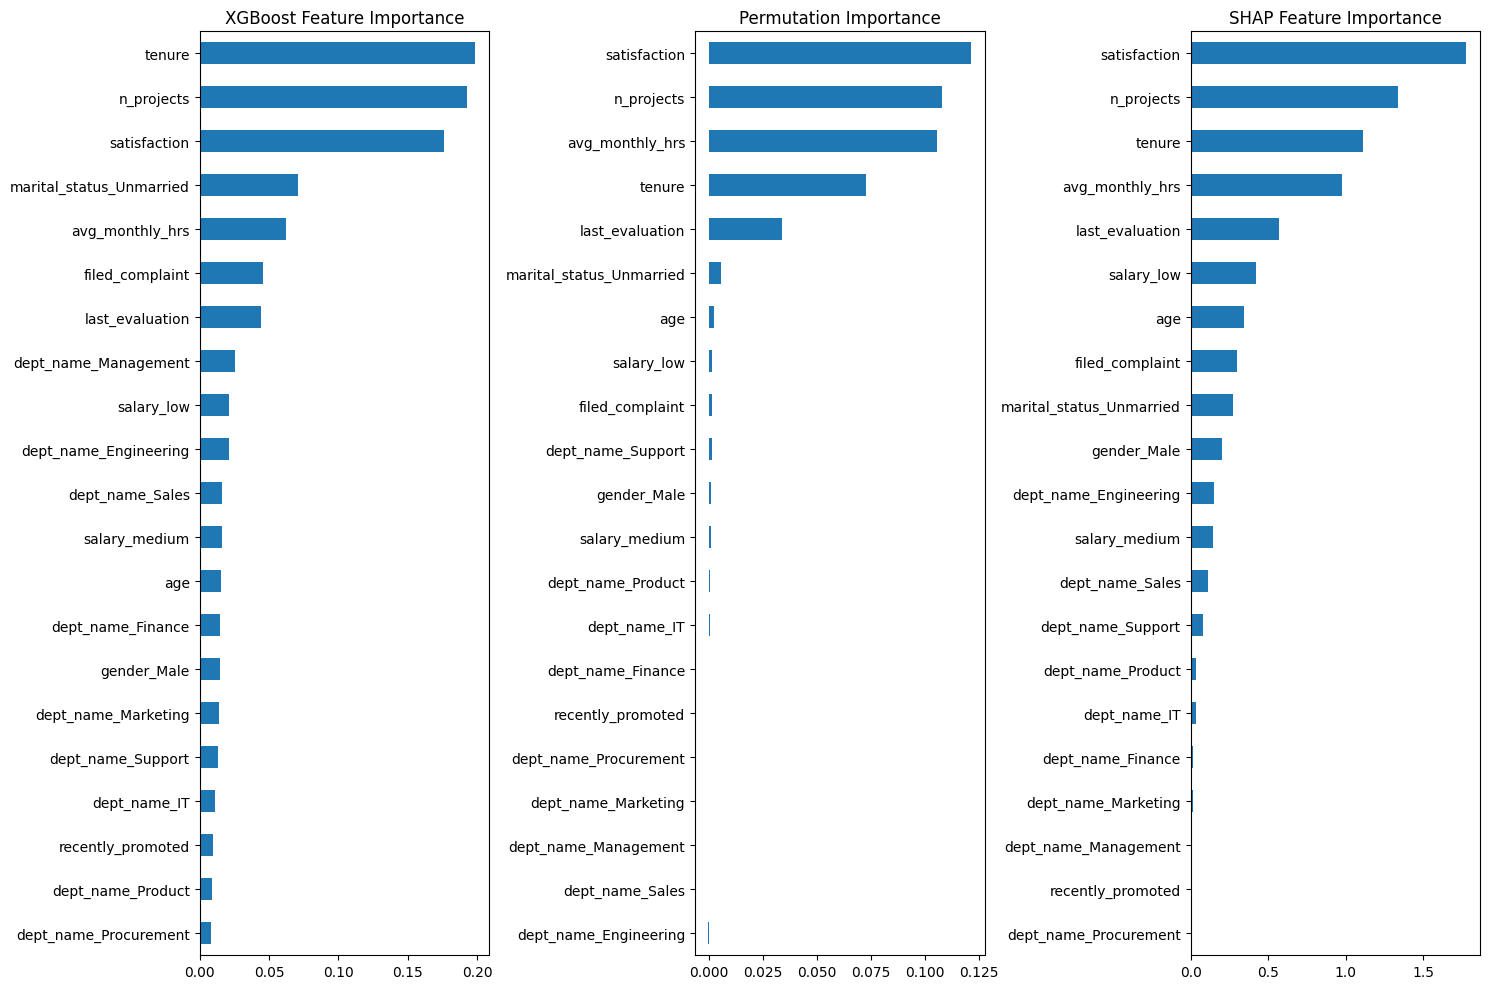

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import xgboost as xgb
import shap
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (excluding target and redundant columns)
all_features = ['dept_name', 'avg_monthly_hrs', 
                'filed_complaint', 'last_evaluation', 'n_projects', 
                'recently_promoted', 'salary', 'satisfaction', 'tenure', 
                'age', 'gender', 'marital_status']

def validate_feature_importance(df_duplicate, all_features, target='status_numerical'): #target variable is 'status_numerical'
    """
    Comprehensive feature importance validation using multiple methods
    """
    # Prepare data
    X = df_duplicate[all_features].copy()
    y = df_duplicate[target]
    
    # Convert boolean columns to int
    bool_columns = X.select_dtypes(include=['bool']).columns
    for col in bool_columns:
        X[col] = X[col].astype(int)
    
    # Handle categorical variables
    X = pd.get_dummies(X, drop_first=True)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    
    # Train XGBoost model
    xgb_model = xgb.XGBClassifier(random_state=42)
    xgb_model.fit(X_train_scaled, y_train)
    
    # Get SHAP values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_test_scaled)
    
    # Calculate permutation importance
    perm_importance = permutation_importance(xgb_model, X_test_scaled, y_test, 
                                          n_repeats=10, random_state=42)
    
    # Print feature importances
    print("\nFeature Importances:")
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'XGBoost': xgb_model.feature_importances_,
        'Permutation': perm_importance.importances_mean,
        'SHAP': np.abs(shap_values).mean(0) if isinstance(shap_values, np.ndarray) else np.abs(shap_values[1]).mean(0)
    })
    print(importance_df.sort_values('XGBoost', ascending=False))
    
    # Visualize results
    plot_importance_comparison(xgb_model, perm_importance, shap_values, 
                             X_test_scaled, X.columns)
    
    return xgb_model, explainer, shap_values, perm_importance, X.columns


def plot_importance_comparison(xgb_model, perm_importance, shap_values, X_test, feature_names):
    """
    Plot feature importance from different methods
    """
    plt.figure(figsize=(15, 10))
    
    # Plot 1: XGBoost feature importance
    plt.subplot(131)
    xgb_importance = pd.Series(xgb_model.feature_importances_, index=feature_names)
    xgb_importance.sort_values().plot(kind='barh')
    plt.title('XGBoost Feature Importance')
    
    # Plot 2: Permutation Importance
    plt.subplot(132)
    perm_imp = pd.Series(perm_importance.importances_mean, index=feature_names)
    perm_imp.sort_values().plot(kind='barh')
    plt.title('Permutation Importance')
    
    # Plot 3: SHAP Values
    plt.subplot(133)
    shap_importance = pd.Series(np.abs(shap_values).mean(0) if isinstance(shap_values, np.ndarray) 
                               else np.abs(shap_values[1]).mean(0), index=feature_names)
    shap_importance.sort_values().plot(kind='barh')
    plt.title('SHAP Feature Importance')
    
    plt.tight_layout()
    plt.show()

# Run the analysis
print("Starting feature importance validation...")
xgb_model, explainer, shap_values, perm_importance, feature_names = validate_feature_importance(df_duplicate, all_features)
plt.show()

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import xgboost as xgb
import matplotlib.pyplot as plt

# Selected top features
selected_features = ['satisfaction', 'tenure', 'n_projects', 'avg_monthly_hrs', 'last_evaluation']

def build_and_evaluate_model(df_duplicate, target='status_numerical'):
    """
    Build and evaluate logistic regression, Random Forest, XGBoost, and CatBoost using the top features.
    """
    # Prepare the data with selected features
    X = df_duplicate[selected_features].copy()
    y = df_duplicate[target]
    
    # Handle missing values by imputing with the mean
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Logistic Regression Model
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_scaled, y_train)
    lr_pred = lr_model.predict(X_test_scaled)
    lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
    
    # Random Forest Model
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)  # Random forest doesn't require scaling
    rf_pred = rf_model.predict(X_test)
    rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
    
    # XGBoost Model
    xgb_model = xgb.XGBClassifier(random_state=42)
    xgb_model.fit(X_train_scaled, y_train)
    xgb_pred = xgb_model.predict(X_test_scaled)
    xgb_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
    
    # CatBoost Model
    catboost_model = CatBoostClassifier(random_state=42, iterations=1000, learning_rate=0.1, depth=6, verbose=0)
    catboost_model.fit(X_train, y_train)
    # Predictions
    catboost_pred = catboost_model.predict(X_test)
    catboost_pred_proba = catboost_model.predict_proba(X_test)[:, 1]
    
    # Evaluate Logistic Regression
    print("\nLogistic Regression Results:")
    print(classification_report(y_test, lr_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, lr_pred_proba):.3f}")
    
    # Evaluate Random Forest
    print("\nRandom Forest Results:")
    print(classification_report(y_test, rf_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_pred_proba):.3f}")
    
    # Evaluate XGBoost
    print("\nXGBoost Results:")
    print(classification_report(y_test, xgb_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, xgb_pred_proba):.3f}")
    
    # Evaluate the CatBoost model
    print("\nCatBoost Results:")
    print(classification_report(y_test, catboost_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, catboost_pred_proba):.3f}")
    
    return lr_model, rf_model, xgb_model, catboost_model

# Call the function to build and evaluate the models
lr_model, rf_model, xgb_model, catboost_model = build_and_evaluate_model(df_duplicate)


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1970
           1       0.48      0.28      0.35       572

    accuracy                           0.77      2542
   macro avg       0.64      0.59      0.61      2542
weighted avg       0.74      0.77      0.74      2542

ROC-AUC Score: 0.797

Random Forest Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1970
           1       0.99      0.93      0.96       572

    accuracy                           0.98      2542
   macro avg       0.98      0.96      0.97      2542
weighted avg       0.98      0.98      0.98      2542

ROC-AUC Score: 0.990

XGBoost Results:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1970
           1       0.98      0.93      0.95       572

    accuracy                           0.98      2542
   macro avg  

In [41]:
import numpy as np
import pandas as pd

# Sample test data
test_data = {
    'satisfaction': [0.3, 0.12, 0.25, 0.5, 0.55],
    'tenure': [4, 4, 7, 5, 4],
    'n_projects': [8, 7, 6, 8, 5],
    'avg_monthly_hrs': [290, 60, 250, 80, 200],
    'last_evaluation': [0.72, 0.8, 0.89, 0.65, 0.75]
}

# Convert to DataFrame
test_df = pd.DataFrame(test_data)

# Use the trained Random Forest model to predict
# Make sure your Random Forest model (rf_model) is trained and available
predictions = rf_model.predict(test_df)
pred_proba = rf_model.predict_proba(test_df)[:, 1]

# Print predictions and probabilities
print("Predictions (0 = Stayed, 1 = Left):", predictions)
print("Prediction Probabilities:", pred_proba)


Predictions (0 = Stayed, 1 = Left): [1 0 0 1 0]
Prediction Probabilities: [0.85 0.41 0.02 0.51 0.03]


In [42]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming you have your original DataFrame with all the features and target
# If not, create a sample DataFrame similar to your original one
def train_and_save_catboost_model(df_duplicate, target='status_numerical'):
    """
    Train a CatBoost model and return it
    """
    # Selected top features
    selected_features = ['satisfaction', 'tenure', 'n_projects', 'avg_monthly_hrs', 'last_evaluation']
    
    # Prepare the data with selected features
    X = df_duplicate[selected_features].copy()
    y = df_duplicate[target]
    
    # Handle missing values by imputing with the mean
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the CatBoost model
    catboost_model = CatBoostClassifier(
        random_state=42, 
        iterations=1000, 
        learning_rate=0.1, 
        depth=6, 
        verbose=0
    )
    
    # Fit the model
    catboost_model.fit(X_train, y_train)
    
    return catboost_model

# Train the model
catboost_model = train_and_save_catboost_model(df_duplicate)

# Sample test data
test_data = {
    'satisfaction': [0.3, 0.12, 0.25, 0.5, 0.55],
    'tenure': [4, 4, 7, 5, 4],
    'n_projects': [8, 7, 6, 8, 5],
    'avg_monthly_hrs': [290, 60, 250, 80, 200],
    'last_evaluation': [0.72, 0.8, 0.89, 0.65, 0.75]
}
# Convert to DataFrame
test_df = pd.DataFrame(test_data)

# Use the trained CatBoost model to predict
predictions = catboost_model.predict(test_df)
pred_proba = catboost_model.predict_proba(test_df)[:, 1]

# Print predictions and probabilities
print("CatBoost Predictions (0 = Stayed, 1 = Left):", predictions)
print("CatBoost Prediction Probabilities:", pred_proba)

# Optional: Add a bit more context to the predictions
for i, (pred, proba) in enumerate(zip(predictions, pred_proba)):
    status = "Will Leave" if pred == 1 else "Will Stay"
    print(f"Sample {i+1}: Predicted {status} with {proba:.2%} probability")

CatBoost Predictions (0 = Stayed, 1 = Left): [1 0 0 0 0]
CatBoost Prediction Probabilities: [9.99425365e-01 2.41747443e-02 6.32835341e-04 1.94415953e-02
 1.28146163e-02]
Sample 1: Predicted Will Leave with 99.94% probability
Sample 2: Predicted Will Stay with 2.42% probability
Sample 3: Predicted Will Stay with 0.06% probability
Sample 4: Predicted Will Stay with 1.94% probability
Sample 5: Predicted Will Stay with 1.28% probability


In [43]:
df_empid = pd.read_csv("/kaggle/input/df-merged-dept-emp-det/df_merged_dept_emp_det.csv")

In [44]:
df_empid = df_empid.dropna(subset=['tenure', 'satisfaction'])

In [45]:
import pandas as pd

def remove_outliers(df_empid: pd.DataFrame, age_min: int = 18, age_max: int = 65) -> pd.DataFrame:
    # Drop rows with null values in 'age' or 'tenure'
    df_cleaned = df_empid.dropna(subset=['age', 'tenure'])
    
    # Remove rows where 'age' is outside the valid range
    df_cleaned = df_cleaned[(df_cleaned['age'] >= age_min) & (df_cleaned['age'] <= age_max)]
    
    # Rule-based removal: tenure should not exceed age - 18
    df_cleaned = df_cleaned[df_cleaned['tenure'] <= (df_cleaned['age'] - age_min)]
    
    return df_cleaned

# Apply the function
df_empid = remove_outliers(df_empid)


In [46]:
len(df_empid)

12706

In [47]:
len(df_duplicate)

12706

In [48]:
# Prepare the features for prediction
selected_features = ['satisfaction', 'tenure', 'n_projects', 'avg_monthly_hrs', 'last_evaluation']
X_full = df_duplicate[selected_features]

# Create DataFrame with predictions using employee_id as index
df_train_outputs = pd.DataFrame(index=df_empid['employee_id'])

# Add the original status_numerical column
# First, create a Series with employee_id as index and status_numerical as values
status_series = df_duplicate.set_index(df_empid['employee_id'])['status_numerical']
df_train_outputs['status_numerical'] = status_series

# Make predictions on the full dataset
df_train_outputs['randomforest_probability'] = rf_model.predict_proba(X_full)[:, 1]
df_train_outputs['catboost_probability'] = catboost_model.predict_proba(X_full)[:, 1]

# Display the first few rows
print(df_train_outputs.head())

# Save to CSV 
df_train_outputs.to_csv('train_employee_predictions.csv')

             status_numerical  randomforest_probability  catboost_probability
employee_id                                                                  
112868                      1                      0.95              0.994892
122314                      1                      1.00              0.999953
115017                      1                      1.00              0.998104
112281                      1                      0.12              0.005071
120189                      1                      1.00              0.995911


In [49]:
Training_outputs_whole = pd.read_csv("/kaggle/working/train_employee_predictions.csv")

In [50]:
# Prepare the features for prediction
selected_features = ['satisfaction', 'tenure', 'n_projects', 'avg_monthly_hrs', 'last_evaluation']
X_full = df_duplicate[selected_features]

# Create DataFrame with predictions using employee_id as index
df_outputs = pd.DataFrame(index=df_empid['employee_id'])

# Make predictions on the full dataset
df_outputs['randomforest_probability'] = rf_model.predict_proba(X_full)[:, 1]
df_outputs['catboost_probability'] = catboost_model.predict_proba(X_full)[:, 1]

# Display the first few rows
print(df_outputs.head())

# Save to CSV without index to preserve employee_id as a column
df_outputs.to_csv('test_employee_predictions.csv')

             randomforest_probability  catboost_probability
employee_id                                                
112868                           0.95              0.994892
122314                           1.00              0.999953
115017                           1.00              0.998104
112281                           0.12              0.005071
120189                           1.00              0.995911


In [51]:
Test_outputs_whole = pd.read_csv("/kaggle/working/test_employee_predictions.csv")

In [52]:
Test_outputs_whole

,employee_id,randomforest_probability,catboost_probability
0,112868,0.95,0.994892
1,122314,1.00,0.999953
2,115017,1.00,0.998104
3,112281,0.12,0.005071
4,120189,1.00,0.995911
...,...,...,...
12701,109136,0.04,0.027008
12702,106174,0.03,0.009573
12703,102506,0.00,0.006720
12704,117454,0.00,0.004979


In [53]:
Training_outputs_whole

,employee_id,status_numerical,randomforest_probability,catboost_probability
0,112868,1,0.95,0.994892
1,122314,1,1.00,0.999953
2,115017,1,1.00,0.998104
3,112281,1,0.12,0.005071
4,120189,1,1.00,0.995911
...,...,...,...,...
12701,109136,0,0.04,0.027008
12702,106174,0,0.03,0.009573
12703,102506,0,0.00,0.006720
12704,117454,0,0.00,0.004979


Epoch 1/300
318/318 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.9528 - Precision: 0.7509 - Recall: 0.9333 - binary_accuracy: 0.8964 - loss: 0.2858 - val_AUC: 0.9961 - val_Precision: 0.9966 - val_Recall: 0.9833 - val_binary_accuracy: 0.9953 - val_loss: 0.0463 - learning_rate: 0.0010
Epoch 2/300
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.9945 - Precision: 0.9905 - Recall: 0.9849 - binary_accuracy: 0.9942 - loss: 0.0424 - val_AUC: 0.9946 - val_Precision: 0.9966 - val_Recall: 0.9883 - val_binary_accuracy: 0.9965 - val_loss: 0.0239 - learning_rate: 0.0010
Epoch 3/300
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.9959 - Precision: 0.9968 - Recall: 0.9855 - binary_accuracy: 0.9957 - loss: 0.0247 - val_AUC: 0.9965 - val_Precision: 0.9916 - val_Recall: 0.9883 - val_binary_accuracy: 0.9953 - val_loss: 0.0252 - learning_rate: 0.0010
Epoch 4/300
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.9964 - Precision: 0.9898 - Recall: 0.9865 - binary_accuracy: 0.9945 - loss: 0.0255 - val_AUC: 0

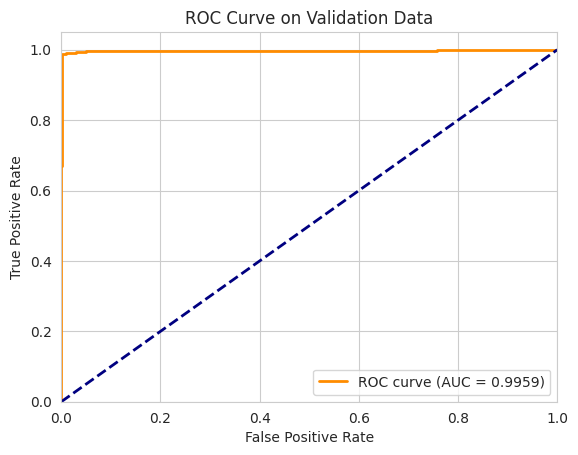

398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
  dept_name  avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0        IT              244              0.0         0.926197           6   
1        IT              289              0.0         0.929858           7   
2        IT              158              0.0         0.546333           2   
3        IT              277              0.0         0.949600           2   
4        IT              127              0.0         0.568392           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id  age  \
0                0.0  medium      0.061868   Left     5.0       112868   29   
1                0.0     low      0.161744   Left     4.0       122314   36   
2                0.0     low      0.391487   Left     3.0       115017   24   
3                0.0  medium      0.723212   Left     3.0       112281   28   
4                0.0     low      0.455544   Left     3.0       120189   23   

   gender marit

In [54]:
import pandas as pd
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Adjust learning rate and early stopping callbacks
learning_rate_reduction = ReduceLROnPlateau(monitor='val_binary_accuracy', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_binary_accuracy',
                               min_delta=1e-8, 
                               patience=20, 
                               restore_best_weights=True)

# Prepare data for ensembling
X_ens = Training_outputs_whole[['randomforest_probability', 'catboost_probability']]
y_ens = Training_outputs_whole[['status_numerical']]
X_ens_train_val, X_ens_test, y_ens_train_val, y_ens_test = train_test_split(
    X_ens, y_ens, test_size=0.2, stratify=y_ens, random_state=77
)

# Prepare test data
X_ens_whole_deep = Test_outputs_whole[['randomforest_probability', 'catboost_probability']]

# Define the neural network model
nn_model = models.Sequential()
nn_model.add(layers.Dense(128, activation='relu', input_shape=(X_ens_train_val.shape[1],)))
nn_model.add(layers.BatchNormalization())
nn_model.add(layers.Dropout(0.3))
nn_model.add(layers.Dense(64, activation='relu'))
nn_model.add(layers.BatchNormalization())
nn_model.add(layers.Dropout(0.3))
nn_model.add(layers.Dense(32, activation='relu'))
nn_model.add(layers.BatchNormalization())
nn_model.add(layers.Dropout(0.3))
nn_model.add(layers.Dense(16, activation='relu'))
nn_model.add(layers.BatchNormalization())
nn_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy', 'AUC', 'Precision', 'Recall'])

# Train the model
history_nn_whole = nn_model.fit(
    X_ens_train_val, y_ens_train_val, validation_data=(X_ens_test, y_ens_test),
    epochs=300, callbacks=[early_stopping, learning_rate_reduction]
)

# Generate predictions for the validation set and calculate ROC curve metrics
y_pred_val = nn_model.predict(X_ens_test).flatten()
fpr, tpr, _ = roc_curve(y_ens_test, y_pred_val)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation Data')
plt.legend(loc="lower right")
plt.show()

# Generate predictions on the test set
y_pred_deep_whole = nn_model.predict(X_ens_whole_deep).flatten()  # Flatten to 1D array if necessary

# Convert predictions to DataFrame
y_pred_deep_whole_df = pd.DataFrame(data=y_pred_deep_whole, columns=['nn_model_prediction'])

# Merge predictions with df_duplicate
# Assuming df_duplicate already includes columns ['status', 'status_numerical', 'randomforest_probability', 'catboost_probability']
df_output = df_duplicate.copy()
df_output = pd.concat([df_output.reset_index(drop=True), y_pred_deep_whole_df.reset_index(drop=True)], axis=1)

# Save to CSV
df_output.to_csv('submission_with_predictions.csv', index=False)

print(df_output.head())  # Display first few rows to verify


In [55]:
# Step 1: Load the data
df_submission = pd.read_csv("/kaggle/working/submission_with_predictions.csv")

# Step 2: Create a new column with binary values (1 or 0) based on the prediction probability in 'nn_model_prediction'
df_submission['nn_model_binary'] = df_submission['nn_model_prediction'].apply(lambda x: 1 if x >= 0.5 else 0)

# Step 3: Filter rows where the binary prediction does not match 'status_numerical'
df_submission['Prediction_Match'] = df_submission['nn_model_binary'] == df_submission['status_numerical']

# Step 4: Drop the 'status_encoded' column if it exists
if 'status_encoded' in df_submission.columns:
    df_submission = df_submission.drop(columns=['status_encoded'])

# Step 5: Save the modified DataFrame to a new CSV
df_submission.to_csv("/kaggle/working/submission_with_predictions.csv", index=False)


In [59]:
df_submission

,dept_name,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,status_numerical,nn_model_prediction,nn_model_binary,Prediction_Match
0,IT,244,0.0,0.926197,6,0.0,medium,0.061868,Left,5.0,112868,29,Female,Married,1,0.999273,1,True
1,IT,289,0.0,0.929858,7,0.0,low,0.161744,Left,4.0,122314,36,Female,Married,1,0.999503,1,True
2,IT,158,0.0,0.546333,2,0.0,low,0.391487,Left,3.0,115017,24,Female,Unmarried,1,0.999501,1,True
3,IT,277,0.0,0.949600,2,0.0,medium,0.723212,Left,3.0,112281,28,Male,Unmarried,1,0.013634,0,False
4,IT,127,0.0,0.568392,2,0.0,low,0.455544,Left,3.0,120189,23,Female,Unmarried,1,0.999499,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12701,Product,178,0.0,0.736266,2,0.0,low,0.356486,Employed,3.0,109136,23,Male,Unmarried,0,0.006741,0,True
12702,Product,196,0.0,0.827836,4,0.0,low,0.543141,Employed,5.0,106174,37,Male,Married,0,0.007139,0,True
12703,Product,262,0.0,0.765994,5,0.0,medium,0.741471,Employed,2.0,102506,41,Male,Married,0,0.006147,0,True
12704,Product,212,0.0,0.773018,4,0.0,medium,0.829316,Employed,2.0,117454,51,Female,Married,0,0.006181,0,True
